Coeficientes do polinômio interpolador: [ 3.64747869e-18 -1.14379344e-16  1.28439018e-15 -5.98241386e-15
  2.00000000e+00 -1.26909063e-15]
Coeficientes arredondados: [ 0. -0.  0. -0.  2. -0.]
Polinômio interpolador:
            5             4             3             2
3.647e-18 x - 1.144e-16 x + 1.284e-15 x - 5.982e-15 x + 2 x - 1.269e-15
Polinômio interpolador arredondado:
  
2 x - 0
Velocidades estimadas (polinômio arredondado):
Tempo = 1s: Velocidade = 2.0 m/s
Tempo = 3s: Velocidade = 6.0 m/s
Tempo = 5s: Velocidade = 10.0 m/s
Tempo = 7s: Velocidade = 14.0 m/s
Tempo = 9s: Velocidade = 18.0 m/s


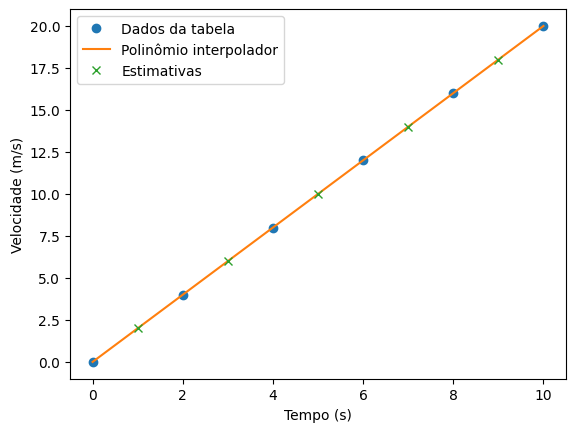

In [ ]:
# 1

import numpy as np
import matplotlib.pyplot as plt

# Definindo os pontos (Obtidos da tabela)
x = np.array([0, 2, 4, 6, 8, 10]) #Tempo
y = np.array([0, 4, 8, 12, 16, 20]) #Velocidade

# Calculando os coeficientes do polinômio interpolador
coef = np.polyfit(x, y, 5)
print("Coeficientes do polinômio interpolador:", coef)

# Arredondando os coeficientes (Os números ficam gigantes)
coef_arredondado = np.round(coef, decimals=2)
print("Coeficientes arredondados:", coef_arredondado)

# Criando o polinômio interpolador
polinomio = np.poly1d(coef)
polinomio_arredondado = np.poly1d(coef_arredondado)
print("Polinômio interpolador:\n", polinomio)
print("Polinômio interpolador arredondado:\n", polinomio_arredondado)

# Estimativas em tempos não medidos
tempos_estimados = np.array([1, 3, 5, 7, 9])
velocidades_estimadas = polinomio(tempos_estimados)
velocidades_estimadas_arredondado = polinomio_arredondado(tempos_estimados)


print("Velocidades estimadas (polinômio arredondado):")
for t, v in zip(tempos_estimados, velocidades_estimadas_arredondado):
    print(f"Tempo = {t}s: Velocidade = {v} m/s")

# Visualização do polinômio interpolador
x_vals = np.linspace(0, 10, 100)
y_vals = polinomio_arredondado(x_vals)

plt.plot(x, y, 'o', label='Dados da tabela')
plt.plot(x_vals, y_vals, '-', label='Polinômio interpolador')
plt.plot(tempos_estimados, velocidades_estimadas_arredondado, 'x', label='Estimativas')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend()
plt.show()


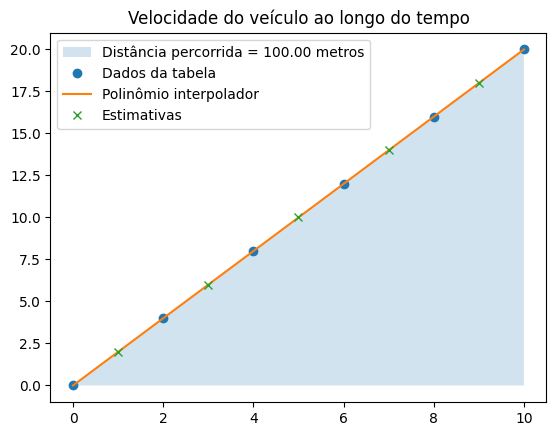

In [ ]:
# 2

import numpy as np

# Tempo (em segundos) e velocidade (em m/s) do veículo
tempo = np.array([0, 2, 4, 6, 8, 10])
velocidade_ms = np.array([0, 4, 8, 12, 16, 20])

# Utilizando a regra dos trapézios para calcular a integral da velocidade
# A altura h dos trapézios é a diferença de tempo entre as medições em segundos
h = tempo[1] - tempo[0]  # Intervalo de tempo regular

# A área total pela regra dos trapézios é dada por:
area_trapézios = (h/2) * (velocidade_ms[0] + 2*np.sum(velocidade_ms[1:-1]) + velocidade_ms[-1])

# A distância total percorrida é a área sob a curva de velocidade
distância_total = area_trapézios

# Fazendo o gráfico
plt.fill_between(tempo, velocidade_ms, alpha=0.2, label=f'Distância percorrida = {distância_total:.2f} metros')
plt.title('Velocidade do veículo ao longo do tempo')
plt.plot(x, y, 'o', label='Dados da tabela')
plt.plot(x_vals, y_vals, '-', label='Polinômio interpolador')
plt.plot(tempos_estimados, velocidades_estimadas_arredondado, 'x', label='Estimativas')
plt.legend()
plt.show()


In [ ]:
# 3
import numpy as np

def minimioQuadrado(X, Y):

  SumX = 0
  SumY = 0
  SumX2 = 0
  SumXY = 0
  num = len(X)

  #SETANDO OS DADOS PARA MANIPULAÇÃO
  for i in range(num):
    SumX += X[i]
    SumX2 += pow(X[i], 2)
    SumY += Y[i]
    SumXY += Y[i] * X[i]

  #Calculando medias (X e Y)
  mediaX = SumX / num
  mediaY = SumY / num

  #Coeficiente de inclinação (b)
  b = num * (SumXY) - (SumX * SumY)
  b = b / (num*SumX2 - pow(SumX, 2))

  #Intercepto (a)
  a = mediaY - (b * mediaX)

  #equação da linha de regressão
  print("y =", a, "+", b, "x")

  return a, b


In [ ]:
# 4
from math import floor

def funcaoF(x, equacao):
  controle = len(equacao)
  Y = float(equacao[0])
  for i in range(1, controle):
    Y += float(equacao[i]) * pow(x , i)
  return round(Y, 3)

def calculoRaizes(a, b, formula, tolerancia):
  fA = funcaoF(a, formula)
  fA = float(fA)

  fB = funcaoF(b, formula)
  fB = float(fB)

  if (fA * fB >= 0):
    print("não tem raíz nesse intervalo")
    return #não tem raíz nesse intervalo

  #Calculo ponto médio e função no ponto médio
  while ((b - a)> tolerancia):
    xn = (a + b) / 2
    fxn = funcaoF(xn, formula)
    print("a ", a,"f(a)", fA)
    print("b ", b,"f(b)",fB)
    print("xn ", xn,"f(xn)",fxn)
    print("(fA * fxn)", round((fA * fxn), 3))
    print("CT ", (b - a))
    print()
    if (fxn == 0):
      return xn  # xn é a raiz
    if(((fA * fxn)) < 0):
      fB = fxn
      b = xn
    else:
      fA = fxn
      a = xn

  #media dos pontos a e b como aproximação da raiz caso não tenha encontrado
  return (fA + fB)/2

In [ ]:
X = [0,2,4,6,8,10]
Y = [0,4,8,12,16,20]
m = minimioQuadrado(X, Y)
calculoRaizes(0, 10, m, 0.001)

y = 0.0 + 2.0 x
não tem raíz nesse intervalo
